# পিটার এবং নেকড়ে: রিইনফোর্সমেন্ট লার্নিং প্রাইমার

এই টিউটোরিয়ালে, আমরা পথ খোঁজার সমস্যায় রিইনফোর্সমেন্ট লার্নিং প্রয়োগ করা শিখব। এই সেটিংটি রাশিয়ান সুরকার [সের্গেই প্রোকোফিয়েভ](https://en.wikipedia.org/wiki/Sergei_Prokofiev) এর [পিটার এবং নেকড়ে](https://en.wikipedia.org/wiki/Peter_and_the_Wolf) নামক সঙ্গীতধর্মী রূপকথা দ্বারা অনুপ্রাণিত। এটি তরুণ পথিক পিটারের গল্প, যে সাহসিকতার সাথে তার বাড়ি থেকে বেরিয়ে বনভূমির দিকে যায় নেকড়েকে তাড়ানোর জন্য। আমরা এমন মেশিন লার্নিং অ্যালগরিদম প্রশিক্ষণ দেব যা পিটারকে আশেপাশের এলাকা অন্বেষণ করতে এবং একটি সর্বোত্তম নেভিগেশন মানচিত্র তৈরি করতে সাহায্য করবে।

প্রথমে, চলুন কিছু দরকারী লাইব্রেরি ইমপোর্ট করি:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## রিইনফোর্সমেন্ট লার্নিং-এর সংক্ষিপ্ত বিবরণ

**রিইনফোর্সমেন্ট লার্নিং** (RL) একটি শেখার পদ্ধতি যা আমাদেরকে একটি **এজেন্ট**-এর **পরিবেশ**-এ **অনুকূল আচরণ** শেখার সুযোগ দেয়, অনেকগুলো পরীক্ষা চালানোর মাধ্যমে। এই পরিবেশে একটি এজেন্টের অবশ্যই একটি **লক্ষ্য** থাকতে হবে, যা একটি **রিওয়ার্ড ফাংশন** দ্বারা সংজ্ঞায়িত।

## পরিবেশ

সহজতার জন্য, চলুন পিটারের জগৎকে `width` x `height` আকারের একটি বর্গাকার বোর্ড হিসেবে কল্পনা করি। এই বোর্ডের প্রতিটি সেল হতে পারে:
* **মাটি**, যেখানে পিটার এবং অন্যান্য প্রাণীরা হাঁটতে পারে
* **পানি**, যেখানে আপনি স্পষ্টতই হাঁটতে পারবেন না
* **গাছ** বা **ঘাস** - এমন একটি জায়গা যেখানে আপনি বিশ্রাম নিতে পারেন
* **আপেল**, যা এমন কিছু যা পিটার খুঁজে পেলে খুশি হবে এবং নিজেকে খাওয়াতে পারবে
* **নেকড়ে**, যা বিপজ্জনক এবং এড়িয়ে চলা উচিত

পরিবেশের সাথে কাজ করার জন্য, আমরা `Board` নামে একটি ক্লাস সংজ্ঞায়িত করব। এই নোটবুকটি খুব বেশি জটিল না করার জন্য, বোর্ডের সাথে কাজ করার সমস্ত কোড আমরা একটি আলাদা `rlboard` মডিউলে সরিয়ে নিয়েছি, যা আমরা এখন ইমপোর্ট করব। আপনি এই মডিউলের ভিতরে তাকিয়ে বাস্তবায়নের অভ্যন্তরীণ বিষয়গুলো সম্পর্কে আরও বিশদ জানতে পারেন।


এখন চলুন একটি র্যান্ডম বোর্ড তৈরি করি এবং দেখি এটি কেমন দেখায়:


In [4]:
# code block 1

## কার্যকলাপ এবং নীতি

আমাদের উদাহরণে, পিটারের লক্ষ্য হবে একটি আপেল খুঁজে বের করা, একই সাথে নেকড়ে এবং অন্যান্য বাধাগুলো এড়ানো। এই কার্যকলাপগুলো একটি ডিকশনারি হিসেবে সংজ্ঞায়িত করুন এবং সেগুলোকে সংশ্লিষ্ট কোঅর্ডিনেট পরিবর্তনের জোড়ার সাথে মানচিত্র করুন।


In [5]:
# code block 2

আমাদের এজেন্ট (পিটার)-এর কৌশল একটি তথাকথিত **নীতি** দ্বারা সংজ্ঞায়িত হয়। চলুন সবচেয়ে সহজ নীতি, **র্যান্ডম ওয়াক** নিয়ে আলোচনা করি।

## র্যান্ডম ওয়াক

প্রথমে চলুন একটি র্যান্ডম ওয়াক কৌশল বাস্তবায়ন করে আমাদের সমস্যার সমাধান করি।


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## পুরস্কার ফাংশন

আমাদের নীতিকে আরও বুদ্ধিমান করতে, আমাদের বুঝতে হবে কোন পদক্ষেপগুলো অন্যগুলোর তুলনায় "ভালো"।


In [8]:
#code block 5

## কিউ-লার্নিং

একটি কিউ-টেবিল বা বহু-মাত্রিক অ্যারে তৈরি করুন। যেহেতু আমাদের বোর্ডের মাত্রা `width` x `height`, আমরা কিউ-টেবিলকে একটি numpy অ্যারে দিয়ে উপস্থাপন করতে পারি যার আকার হবে `width` x `height` x `len(actions)`।


In [9]:
# code block 6

বোর্ডে টেবিলটি ভিজুয়ালাইজ করার জন্য Q-টেবিলটি `plot` ফাংশনে পাস করুন:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## কিউ-লার্নিং এর মূলভাব: বেলম্যান সমীকরণ এবং শেখার অ্যালগরিদম

আমাদের শেখার অ্যালগরিদমের জন্য একটি ছদ্ম-কোড লিখুন:

* সমস্ত অবস্থান এবং ক্রিয়ার জন্য সমান সংখ্যায় Q-টেবিল Q আরম্ভ করুন
* শেখার হার নির্ধারণ করুন $\alpha\leftarrow 1$
* সিমুলেশন বহুবার পুনরাবৃত্তি করুন
   1. এলোমেলো অবস্থান থেকে শুরু করুন
   1. পুনরাবৃত্তি করুন
        1. অবস্থান $s$-এ একটি ক্রিয়া $a$ নির্বাচন করুন
        2. ক্রিয়া সম্পাদন করে নতুন অবস্থান $s'$-এ যান
        3. যদি আমরা খেলার শেষ অবস্থার সম্মুখীন হই, অথবা মোট পুরস্কার খুব কম হয় - সিমুলেশন থেকে বেরিয়ে আসুন  
        4. নতুন অবস্থানে পুরস্কার $r$ গণনা করুন
        5. বেলম্যান সমীকরণ অনুযায়ী Q-ফাংশন আপডেট করুন: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. মোট পুরস্কার আপডেট করুন এবং $\alpha$ হ্রাস করুন।

## শোষণ বনাম অনুসন্ধান

শ্রেষ্ঠ পদ্ধতি হলো অনুসন্ধান এবং শোষণের মধ্যে ভারসাম্য বজায় রাখা। আমরা যখন আমাদের পরিবেশ সম্পর্কে আরও শিখি, তখন আমরা সর্বোত্তম পথ অনুসরণ করার সম্ভাবনা বেশি রাখব, তবে মাঝে মাঝে অনাবিষ্কৃত পথ বেছে নেওয়াও গুরুত্বপূর্ণ।

## পাইথন বাস্তবায়ন

এখন আমরা শেখার অ্যালগরিদম বাস্তবায়ন করতে প্রস্তুত। তার আগে, আমাদের এমন একটি ফাংশন প্রয়োজন যা Q-টেবিলের এলোমেলো সংখ্যাগুলিকে সংশ্লিষ্ট ক্রিয়াগুলির জন্য সম্ভাবনার ভেক্টরে রূপান্তর করবে:


In [10]:
# code block 7

আমরা মূল ভেক্টরে একটি ছোট পরিমাণ `eps` যোগ করি যাতে প্রাথমিক ক্ষেত্রে, যখন ভেক্টরের সমস্ত উপাদান অভিন্ন হয়, তখন 0 দিয়ে ভাগ করার সমস্যা এড়ানো যায়।

আমরা যে প্রকৃত শিক্ষণ অ্যালগরিদমটি চালাব তা ৫০০০টি পরীক্ষার জন্য, যাকে **epochs** ও বলা হয়:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

এই অ্যালগরিদমটি কার্যকর করার পরে, Q-টেবিলটি এমন মানগুলির সাথে আপডেট হওয়া উচিত যা প্রতিটি ধাপে বিভিন্ন ক্রিয়ার আকর্ষণীয়তা সংজ্ঞায়িত করে। এখানে টেবিলটি চিত্রিত করুন:


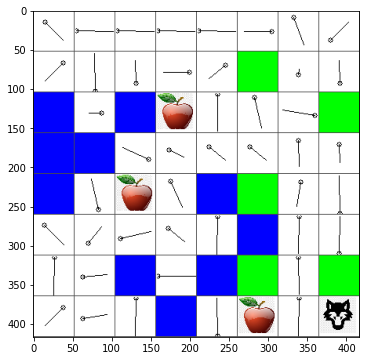

In [43]:
m.plot(Q)

## নীতিটি পরীক্ষা করা

যেহেতু Q-Table প্রতিটি অবস্থায় প্রতিটি ক্রিয়ার "আকর্ষণীয়তা" তালিকাভুক্ত করে, এটি আমাদের জগতে কার্যকর নেভিগেশন সংজ্ঞায়িত করতে ব্যবহার করা বেশ সহজ। সবচেয়ে সহজ ক্ষেত্রে, আমরা কেবল Q-Table এর সর্বোচ্চ মানের সাথে সম্পর্কিত ক্রিয়াটি নির্বাচন করতে পারি:


In [13]:
# code block 9

2

যদি আপনি উপরের কোডটি কয়েকবার চেষ্টা করেন, আপনি লক্ষ্য করতে পারেন যে কখনও কখনও এটি কেবল "আটকে যায়", এবং আপনাকে নোটবুকের STOP বোতামটি চাপ দিয়ে এটি বন্ধ করতে হয়।

> **কাজ ১:** `walk` ফাংশনটি সংশোধন করুন যাতে এটি পথের সর্বাধিক দৈর্ঘ্য একটি নির্দিষ্ট সংখ্যক ধাপে (ধরা যাক, ১০০) সীমাবদ্ধ করে, এবং উপরের কোডটি মাঝে মাঝে এই মানটি ফেরত দেয় কিনা তা পর্যবেক্ষণ করুন।

> **কাজ ২:** `walk` ফাংশনটি সংশোধন করুন যাতে এটি পূর্বে যেসব স্থানে ইতিমধ্যে গিয়েছে সেখানে আবার না যায়। এটি `walk`-কে লুপিং থেকে রোধ করবে, তবে এজেন্ট এখনও এমন একটি স্থানে "ফেঁসে" যেতে পারে যেখান থেকে এটি বের হতে অক্ষম।


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


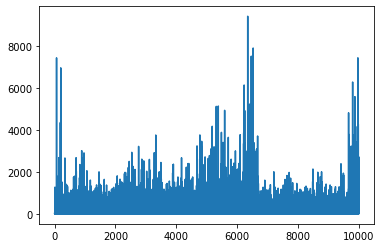

In [57]:
plt.plot(lpath)

## অনুশীলন
## একটি আরও বাস্তবসম্মত পিটার এবং নেকড়ে বিশ্ব



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিকতার জন্য চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা দায়বদ্ধ থাকব না।
